## About the project

In this project we will Use kaggle api to download the cat vs dog dataset

then we will analyze it and make a model that can predict if a image is cat or dog.

## Workflow

Dataset => Image Procesing => Trest Train Split => Neural Network

New Image => Trained Neural Network => dog cat image prediction

## Code

In [ ]:
!pip install kaggle

In [ ]:
#configuring the path of kaggle.json

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c dogs-vs-cats

100% 810M/812M [00:28<00:00, 28.6MB/s]
100% 812M/812M [00:28<00:00, 29.6MB/s]


In [ ]:
ls

dogs-vs-cats.zip  kaggle.json  sample_data/


In [ ]:
# Extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/dogs-vs-cats.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [ ]:
# Extracting the compressed training dataset
from zipfile import ZipFile

dataset = '/content/train.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [ ]:
# Printing the number of images
import os

path, dirs, files = next(os.walk("/content/train"))
file_count = len(files)
print("Number of images: ", file_count)

Number of images:  25000


In [ ]:
# Printing the name if the files
file_names = os.listdir("/content/train")
print(file_names)

['cat.5290.jpg', 'cat.1512.jpg', 'cat.9078.jpg', 'cat.5080.jpg', 'dog.5835.jpg', 'cat.10307.jpg', 'dog.8335.jpg', 'dog.569.jpg', 'cat.4811.jpg', 'dog.4105.jpg', 'cat.4749.jpg', 'dog.11032.jpg', 'cat.5482.jpg', 'cat.12278.jpg', 'dog.6170.jpg', 'cat.10608.jpg', 'dog.12132.jpg', 'cat.7611.jpg', 'dog.9268.jpg', 'dog.7417.jpg', 'cat.6370.jpg', 'cat.4164.jpg', 'dog.2663.jpg', 'cat.11020.jpg', 'dog.3520.jpg', 'cat.6126.jpg', 'dog.6914.jpg', 'dog.3347.jpg', 'cat.9606.jpg', 'cat.1343.jpg', 'dog.6636.jpg', 'dog.9291.jpg', 'dog.4541.jpg', 'dog.4646.jpg', 'cat.8923.jpg', 'cat.5517.jpg', 'cat.12264.jpg', 'cat.849.jpg', 'cat.1488.jpg', 'dog.6382.jpg', 'dog.5769.jpg', 'dog.2482.jpg', 'dog.12014.jpg', 'dog.11417.jpg', 'dog.2835.jpg', 'cat.807.jpg', 'dog.3687.jpg', 'cat.10279.jpg', 'cat.11053.jpg', 'cat.11840.jpg', 'dog.1522.jpg', 'cat.79.jpg', 'cat.3385.jpg', 'dog.2561.jpg', 'cat.1548.jpg', 'cat.7876.jpg', 'dog.4776.jpg', 'dog.4099.jpg', 'dog.11319.jpg', 'dog.10350.jpg', 'dog.3231.jpg', 'cat.10103.jpg

In [ ]:
# importing the dependencies
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

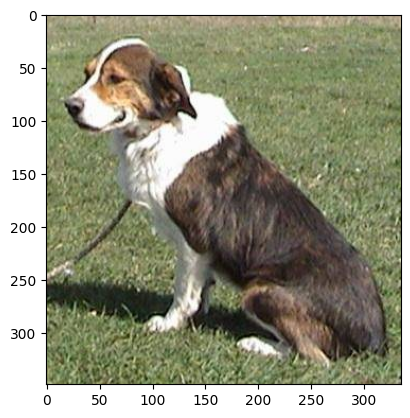

In [ ]:
# Displaying a the dog images
img = mpimg.imread('/content/train/dog.3333.jpg')
imgplot = plt.imshow(img)
plt.show()

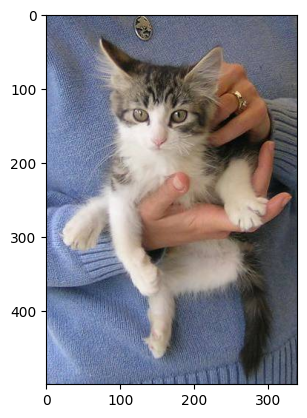

In [ ]:
# Displaying the image of a cat
img = mpimg.imread('/content/train/cat.5080.jpg')
imgplot = plt.imshow(img)
plt.show()

Aww look at that cute little car 🥺

Anyway, as you can see the images are not of the same size. We will have to resize these for better prediction.

In [ ]:
# Dog and cat image count
file_names = os.listdir("/content/train")

for i in range(5):
  name = file_names[i]
  print(name[0:3])

cat
cat
cat
cat
dog


In [ ]:
file_names = os.listdir("/content/train")

dog_count = 0
cat_count = 0

for i in range(len(file_names)):
  name = file_names[i]
  if name[0:3] == 'dog':
    dog_count += 1
  else:
    cat_count += 1

print("Dog count: ", dog_count)
print("Cat count: ", cat_count)

Dog count:  12500
Cat count:  12500


In [ ]:
# Resizing all the images and ptting them in different directory
os.mkdir('/content/resized_train')

In [ ]:
og_folder = '/content/train/'
resized_folder = '/content/resized_train/'

for i in range(2000):
  file_name = os.listdir(og_folder)[i]
  img_path = og_folder+file_name

  img = Image.open(img_path)
  img = img.resize((224, 224))
  img.convert('RGB')

  newImgPath = resized_folder+file_name
  img.save(newImgPath)

We are using 2000 images for simplicity. you cak take all 25k lol. but will prolly take half an hour to process. Good luck XD

In [ ]:
# Creating the labels for the images
# cat = 0
# dog = 1
lebels = []

for i in range(2000):
  file_name = os.listdir(resized_folder)[i]
  if file_name[0:3] == 'dog':
    lebels.append(1)
  elif file_name[0:3] == 'cat':
    lebels.append(0)

In [ ]:
print(file_name[0:5])
print(len(lebels))

dog.2
2000


In [ ]:
# Lebel count
values, counts = np.unique(lebels, return_counts=True)
print(values,'=', counts)

[0 1] = [1007  993]


As you can see the distriution of the image is almost similar.

In [ ]:
# Convertng all the resized images to numpy array
import cv2
import glob

img_dir = '/content/resized_train/'
image_extension = ['png', 'jpg']

files =[]

[files.extend(glob.glob(img_dir + '*.' + e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [ ]:
print(dog_cat_images)

[[[[ 12  20  19]
   [ 13  21  20]
   [ 15  23  22]
   ...
   [  9  11  11]
   [  9  11  11]
   [  8  10  10]]

  [[ 15  23  22]
   [ 15  23  22]
   [ 14  22  21]
   ...
   [  8  10  10]
   [  8  10  10]
   [  8  10  10]]

  [[ 16  24  23]
   [ 15  23  22]
   [ 14  22  21]
   ...
   [  8  10  10]
   [  7   9   9]
   [  7   9   9]]

  ...

  [[ 27  41  39]
   [ 25  39  37]
   [ 23  37  35]
   ...
   [  4   5   3]
   [  3   4   2]
   [  3   4   2]]

  [[ 33  47  45]
   [ 30  44  42]
   [ 27  41  39]
   ...
   [  3   4   2]
   [  3   4   2]
   [  3   4   2]]

  [[ 41  55  53]
   [ 38  52  50]
   [ 35  49  47]
   ...
   [  3   4   2]
   [  3   4   2]
   [  3   4   2]]]


 [[[112 156 187]
   [113 157 188]
   [114 158 189]
   ...
   [ 88 125 205]
   [ 85 124 203]
   [ 88 127 206]]

  [[112 156 187]
   [113 157 188]
   [114 158 189]
   ...
   [ 87 124 204]
   [ 82 121 200]
   [ 81 120 199]]

  [[115 156 188]
   [115 156 188]
   [114 158 189]
   ...
   [ 83 122 201]
   [ 78 117 196]
   [ 73 112

In [ ]:
type(dog_cat_images)

numpy.ndarray

In [ ]:
print(dog_cat_images.shape)

(2000, 224, 224, 3)


2000 images of 224 x 224 dimantion with 3 channels (RGB)

In [ ]:
X = dog_cat_images
y = np.asarray(lebels)

In [ ]:
# Test train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1600, 224, 224, 3)
(400, 224, 224, 3)
(1600,)
(400,)


In [ ]:
# Scaling the data
X_train_reshaped = X_train/255
X_test_reshaped = X_test/255

In [ ]:
print(X_train_reshaped)
print(X_test_reshaped)

[[[[0.56078431 0.75686275 0.6627451 ]
   [0.55294118 0.74901961 0.65490196]
   [0.54509804 0.7372549  0.65098039]
   ...
   [0.47058824 0.72156863 0.70196078]
   [0.45490196 0.70588235 0.68627451]
   [0.43529412 0.68627451 0.66666667]]

  [[0.5254902  0.7254902  0.61960784]
   [0.5254902  0.7254902  0.61960784]
   [0.5254902  0.72156863 0.62745098]
   ...
   [0.45882353 0.70980392 0.69019608]
   [0.45490196 0.70588235 0.68627451]
   [0.44313725 0.69411765 0.6745098 ]]

  [[0.51764706 0.71764706 0.60784314]
   [0.52156863 0.72156863 0.61176471]
   [0.5254902  0.7254902  0.61960784]
   ...
   [0.44313725 0.69411765 0.6745098 ]
   [0.45098039 0.70196078 0.68235294]
   [0.45882353 0.70980392 0.69019608]]

  ...

  [[0.62352941 0.43921569 0.31372549]
   [0.61960784 0.43529412 0.30980392]
   [0.61176471 0.42745098 0.30196078]
   ...
   [0.44705882 0.38039216 0.34509804]
   [0.47843137 0.38039216 0.34117647]
   [0.49019608 0.37254902 0.32941176]]

  [[0.60784314 0.42352941 0.29803922]
   [0.6

Building the Neural Network

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

Here we will use a pretrained model called mobilenet

In [ ]:
# Ensure you're using compatible versions
!pip install -q --upgrade tensorflow tensorflow-hub

In [ ]:
# Define the URL for the MobileNet model
mobilenet_data = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

# Create a KerasLayer from the TensorFlow Hub module
pretrained_model = hub.KerasLayer(mobilenet_data, input_shape=(224, 224, 3), trainable=False)

In [ ]:
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

# Preprocess the input images
X_train_reshaped = preprocess_input(X_train_reshaped)
X_test_reshaped = preprocess_input(X_test_reshaped)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Building a simple CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compiling the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Train the model
model.fit(X_train_reshaped, y_train, epochs=10, validation_data=(X_test_reshaped, y_test))

# Function to make predictions
def predict_image(image_path):
    img = Image.open(image_path).resize((224, 224))  # Resizing the input image to match the input size
    img_array = np.array(img) / 255.0                # Normalizing the image
    img_array = np.expand_dims(img_array, axis=0)    # Adding batch dimension

    prediction = model.predict(img_array)            # Predicting the class
    if prediction < 0.5:
        return 'Cat'
    else:
        return 'Dog'

# Example usage:
image_path = '/content/example_cat.jpeg'
result = predict_image(image_path)
print(f'The image is predicted to be a: {result}')


Epoch 1/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 260s 5s/step - accuracy: 0.4983 - loss: 1.5299 - val_accuracy: 0.5250 - val_loss: 0.6926
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 266s 5s/step - accuracy: 0.4889 - loss: 0.6935 - val_accuracy: 0.4750 - val_loss: 0.6936
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 319s 5s/step - accuracy: 0.5042 - loss: 0.6932 - val_accuracy: 0.4750 - val_loss: 0.6938
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 263s 5s/step - accuracy: 0.5304 - loss: 0.6925 - val_accuracy: 0.4750 - val_loss: 0.6943
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 260s 5s/step - accuracy: 0.5177 - loss: 0.6927 - val_accuracy: 0.4750 - val_loss: 0.6943
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 268s 5s/step - accuracy: 0.4901 - loss: 0.6937 - val_accuracy: 0.4750 - val_loss: 0.6938
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 315s 5s/step - accuracy: 0.5048 - loss: 0.6931 - val_accuracy: 0.4750 - val_loss: 0.6942
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 270s 5s/step - accuracy: 0.5134 - loss: 0.6929 - val_accuracy: 0.4750 - v

Well we got the correct result.

actually i wanted to use this code --



```
import tensorflow as tf
import tensorflow_hub as hub


!pip install -q --upgrade tensorflow tensorflow-hub


mobilenet_data = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_data, input_shape=(224, 224, 3), trainable=False)


number_of_classes = 2

model = tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.Dense(number_of_classes)
])

model.summary()

```


but for some weird reason this did not work no matter ho much i tried. So yea... we made a CCN to make a nwe model.


In [ ]:
image_path = '/content/example_cat.jpeg'

# Function to make predictions
def predict_image(image_path):
    img = Image.open(image_path).resize((224, 224))  # Resizing the input image to match the input size
    img_array = np.array(img) / 255.0                # Normalizing the image
    img_array = np.expand_dims(img_array, axis=0)    # Adding batch dimension

    prediction = model.predict(img_array)            # Predicting the class
    print(prediction)
    if prediction > 0.46:
        return 'Cat'
    else:
        return 'Dog'

# Example usage:
result = predict_image(image_path)
print(f'The image is predicted to be a: {result}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
[[0.46244258]]
The image is predicted to be a: Cat


In [ ]:
# Function to make predictions
image_path = '/content/example_dog.jpg'

def predict_image(image_path):
    img = Image.open(image_path).resize((224, 224))  # Resizing the input image to match the input size
    img_array = np.array(img) / 255.0                # Normalizing the image
    img_array = np.expand_dims(img_array, axis=0)    # Adding batch dimension

    prediction = model.predict(img_array)            # Predicting the class
    print(prediction)
    if prediction > 0.46:
        return 'Cat'
    else:
        return 'Dog'

result = predict_image(image_path)
print(f'The image is predicted to be a: {result}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
[[0.45434588]]
The image is predicted to be a: Dog


Saving and loading the model

In [ ]:
# Save the model using the Keras format
model.save('/content/cat_dog_classifier.keras')

print("Model saved successfully in .keras format.")


Model saved successfully in .keras format.


In [ ]:
from google.colab import files

# Download the model file
files.download('/content/cat_dog_classifier.keras')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Load the model in .keras format
from tensorflow.keras.models import load_model

model = load_model('/content/cat_dog_classifier.keras')

print("Model loaded successfully.")


Model loaded successfully.


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
